<a href="https://colab.research.google.com/github/Maysk/data_science_alura/blob/main/deep_learning_previsao_keras/previsao_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [103]:
#deep_learning_previsao_keras/previsao_notebook.ipynb

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
mpl.rcParams['figure.figsize'] = (15,6)
mpl.rcParams['font.size'] = 21


In [49]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [],[]

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

## Carregamento do Dados

In [16]:
bikes_dataset = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')

In [17]:
bikes_dataset['datas'] = pd.to_datetime(bikes_dataset['datas'])

In [18]:
bikes_dataset.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


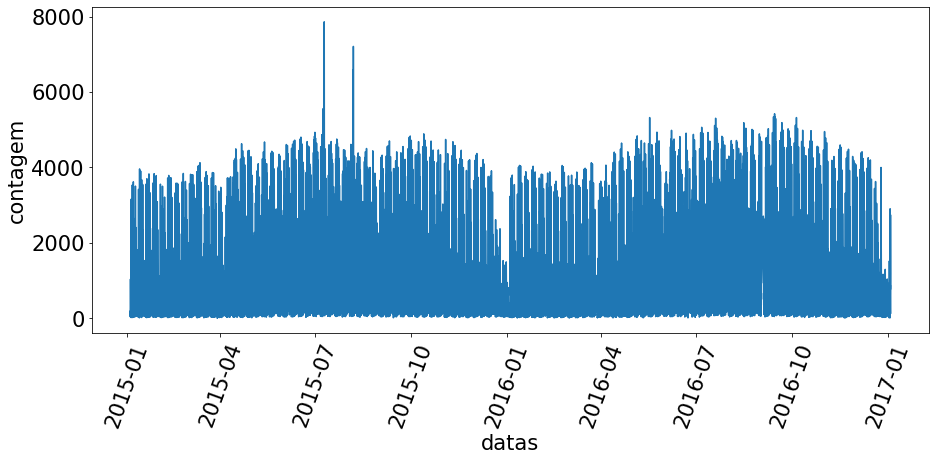

In [19]:
sns.lineplot(x='datas', y='contagem', data=bikes_dataset);
plt.xticks(rotation=70);

##Separando dados e montando modelo

In [40]:
sc = StandardScaler()
sc.fit(bikes_dataset['contagem'].values.reshape(-1,1))
y = sc.transform(bikes_dataset['contagem'].values.reshape(-1,1))

In [41]:
tamanho_treino = int(len(bikes_dataset)*0.9)
# tamanho_teste = len(bikes_dataset) - tamanho_treino
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bikes_dataset)]

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bikes_dataset[0:tamanho_treino], label="dados_treino");
sns.lineplot(x='datas', y=yteste[:,0], data=bikes_dataset[tamanho_treino:len(bikes_dataset)], label="dados_teste");

plt.xticks(rotation=70);

In [67]:
xtreino_novo, ytreino_novo = separa_dados(pd.DataFrame(ytreino)[0],10)
xtreino_novo = xtreino_novo.reshape(xtreino_novo.shape[0], xtreino_novo.shape[1], 1)


In [69]:
xteste_novo, yteste_novo = separa_dados(pd.DataFrame(yteste)[0],10)
xteste_novo = xteste_novo.reshape(xteste_novo.shape[0], xteste_novo.shape[1], 1)

## LSTM

In [ ]:
recorrente = Sequential()
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')
recorrente.summary()

In [ ]:
resultado=recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=10)

In [89]:
y_ajustado = recorrente.predict(xteste_novo)

In [ ]:
sns.lineplot(x='datas', y=yteste[10:,0], data=bikes_dataset[tamanho_treino+10:len(bikes_dataset)], label="y_teste");
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bikes_dataset[tamanho_treino+10:len(bikes_dataset)], label="y_ajustado");

plt.xticks(rotation=70);

## GRU

In [105]:
recorrente_gru = Sequential()
recorrente_gru.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_gru.add(Dense(units=1))
recorrente_gru.compile(loss='mean_squared_error', optimizer='RMSProp')
recorrente_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [106]:
resultado=recorrente_gru.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=10)

Epoch 1/10
490/490 [==============================] - 8s 13ms/step - loss: 0.1826 - val_loss: 0.0622
Epoch 2/10
490/490 [==============================] - 6s 11ms/step - loss: 0.0626 - val_loss: 0.0393
Epoch 3/10
490/490 [==============================] - 6s 12ms/step - loss: 0.0474 - val_loss: 0.0261
Epoch 4/10
490/490 [==============================] - 6s 12ms/step - loss: 0.0419 - val_loss: 0.0315
Epoch 5/10
490/490 [==============================] - 6s 11ms/step - loss: 0.0391 - val_loss: 0.0252
Epoch 6/10
490/490 [==============================] - 6s 11ms/step - loss: 0.0367 - val_loss: 0.0200
Epoch 7/10
490/490 [==============================] - 6s 12ms/step - loss: 0.0356 - val_loss: 0.0226
Epoch 8/10
490/490 [==============================] - 6s 12ms/step - loss: 0.0332 - val_loss: 0.0359
Epoch 9/10
490/490 [==============================] - 6s 12ms/step - loss: 0.0328 - val_loss: 0.0195
Epoch 10/10
490/490 [==============================] - 6s 11ms/step - loss: 0.0318 - val_lo

In [107]:
y_ajustado = recorrente_gru.predict(xteste_novo)

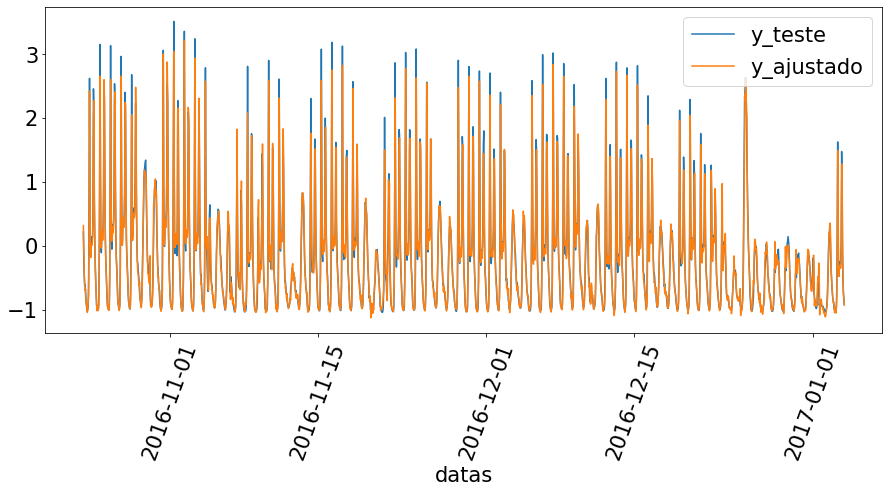

In [108]:
sns.lineplot(x='datas', y=yteste[10:,0], data=bikes_dataset[tamanho_treino+10:len(bikes_dataset)], label="y_teste");
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bikes_dataset[tamanho_treino+10:len(bikes_dataset)], label="y_ajustado");

plt.xticks(rotation=70);

Text(0, 0.5, 'Custo')

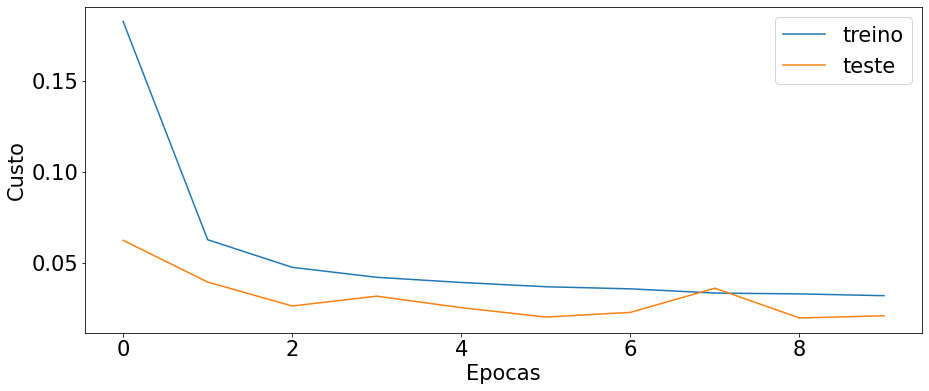

In [111]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Epocas')
plt.ylabel('Custo')

##Material:


*   Outros Otimizadores: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
*   Item da lista


